# Exploratory Data Analysis (EDA)
This notebook performs comprehensive exploratory data analysis on the predictive maintenance dataset.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Set plot style - use modern compatible style
plt.style.use("default")
sns.set_theme(style="whitegrid")

print("Libraries imported successfully")

Libraries imported successfully


## 1. Load Data

In [2]:
# Load dataset
df = pd.read_csv('../data/raw/ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")

Dataset shape: (10000, 14)
Rows: 10,000, Columns: 14


## 2. Dataset Information

In [4]:
# Dataset info
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes:

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
# Statistical summary
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
# Missing values
missing = df.isnull().sum()
print("Missing Values:")
print(missing[missing > 0])

if missing.sum() == 0:
    print("\nNo missing values found!")

Missing Values:
Series([], dtype: int64)

No missing values found!


## 3. Target Variable Analysis

In [8]:
# Target distribution
target_counts = df['Machine failure'].value_counts()
print("Machine Failure Distribution:")
print(target_counts)
print(f"\nClass Balance:")
print(f"No Failure: {target_counts[0]:,} ({target_counts[0]/len(df)*100:.2f}%)")
print(f"Failure: {target_counts[1]:,} ({target_counts[1]/len(df)*100:.2f}%)")
print(f"\nImbalance Ratio: 1:{target_counts[0]/target_counts[1]:.2f}")

Machine Failure Distribution:
Machine failure
0    9661
1     339
Name: count, dtype: int64

Class Balance:
No Failure: 9,661 (96.61%)
Failure: 339 (3.39%)

Imbalance Ratio: 1:28.50


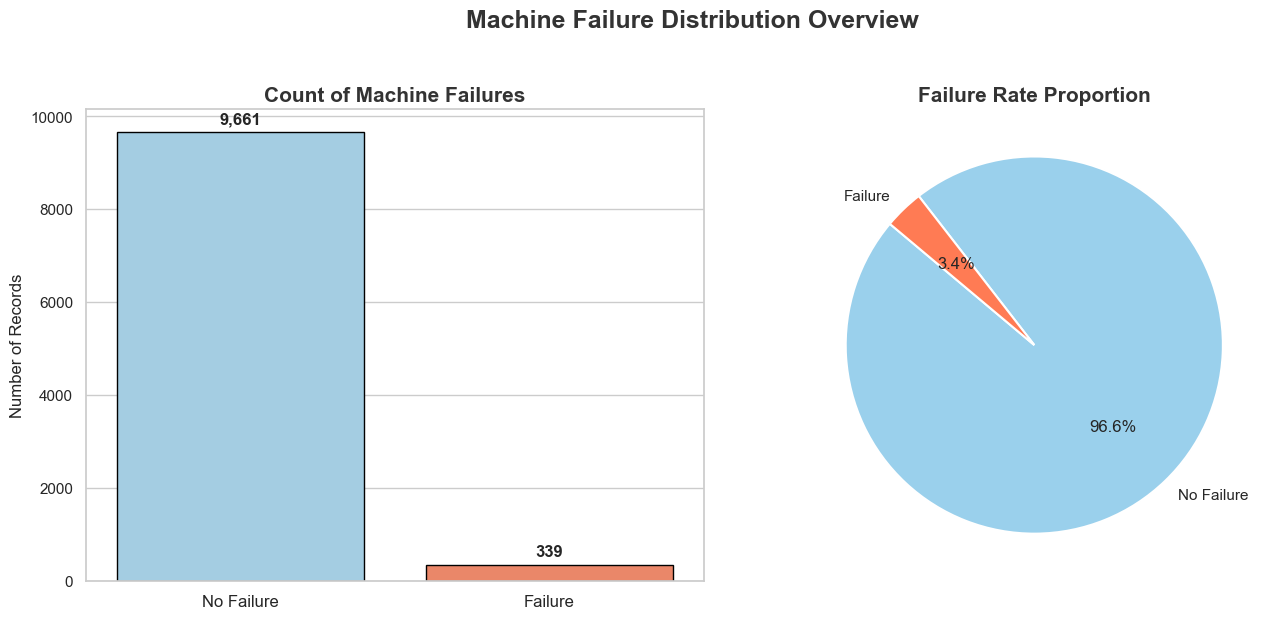

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1.1]})
fig.suptitle('Machine Failure Distribution Overview', fontsize=18, fontweight='bold', color='#333333', y=1.03)

# Bar Plot
sns.barplot(
    x=target_counts.index.map({0: 'No Failure', 1: 'Failure'}),
    y=target_counts.values,
    ax=axes[0],
    palette=['#9AD0EC', '#FF7B54'],
    edgecolor='black'
)

# Annotate counts on bars
for i, val in enumerate(target_counts.values):
    axes[0].text(i, val + target_counts.max() * 0.02, f'{val:,}', ha='center', fontsize=12, fontweight='semibold')

axes[0].set_title('Count of Machine Failures', fontsize=15, fontweight='bold', color='#333333')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Records', fontsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=11)

# Pie Chart
axes[1].pie(
    target_counts,
    labels=['No Failure', 'Failure'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#9AD0EC', '#FF7B54'],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

axes[1].set_title('Failure Rate Proportion', fontsize=15, fontweight='bold', color='#333333')
plt.tight_layout()
plt.show()

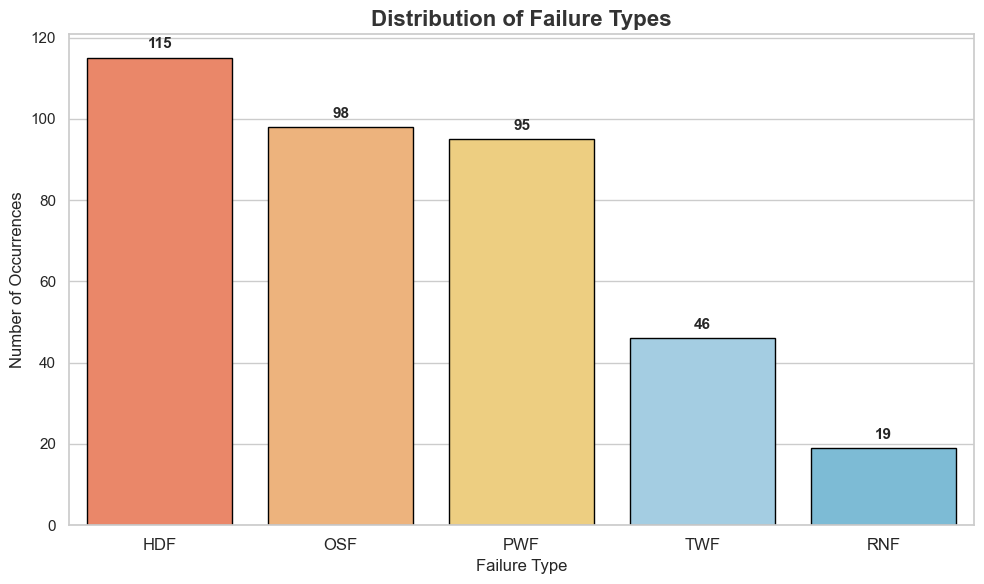

In [10]:
# Failure Types Distribution
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df[failure_types].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=failure_counts.index,
    y=failure_counts.values,
    palette=sns.color_palette(['#FF7B54', '#FFB26B', '#FFD56F', '#9AD0EC', '#6EC1E4']),
    edgecolor='black',
    ax=ax
)

for i, val in enumerate(failure_counts.values):
    ax.text(i, val + failure_counts.max() * 0.02, f'{val:,}', ha='center', fontsize=11, fontweight='semibold')

ax.set_title('Distribution of Failure Types', fontsize=16, fontweight='bold', color='#333333')
ax.set_xlabel('Failure Type', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.show()

## 4. Feature Analysis

Product Type Distribution:
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


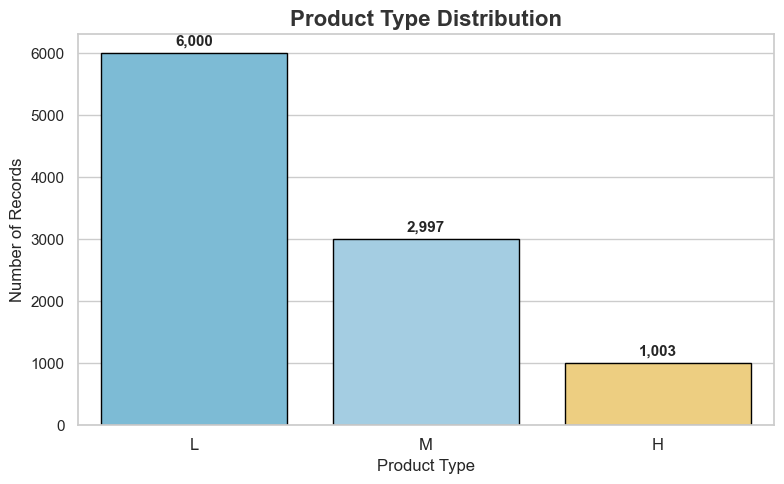

In [11]:
# Product type distribution
type_counts = df['Type'].value_counts()
print("Product Type Distribution:")
print(type_counts)

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    x=type_counts.index,
    y=type_counts.values,
    palette=sns.color_palette(['#6EC1E4', '#9AD0EC', '#FFD56F']),
    edgecolor='black',
    ax=ax
)

for i, val in enumerate(type_counts.values):
    ax.text(i, val + type_counts.max() * 0.02, f'{val:,}', ha='center', fontsize=11, fontweight='semibold')

ax.set_title('Product Type Distribution', fontsize=16, fontweight='bold', color='#333333')
ax.set_xlabel('Product Type', fontsize=12)
ax.set_ylabel('Number of Records', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.show()

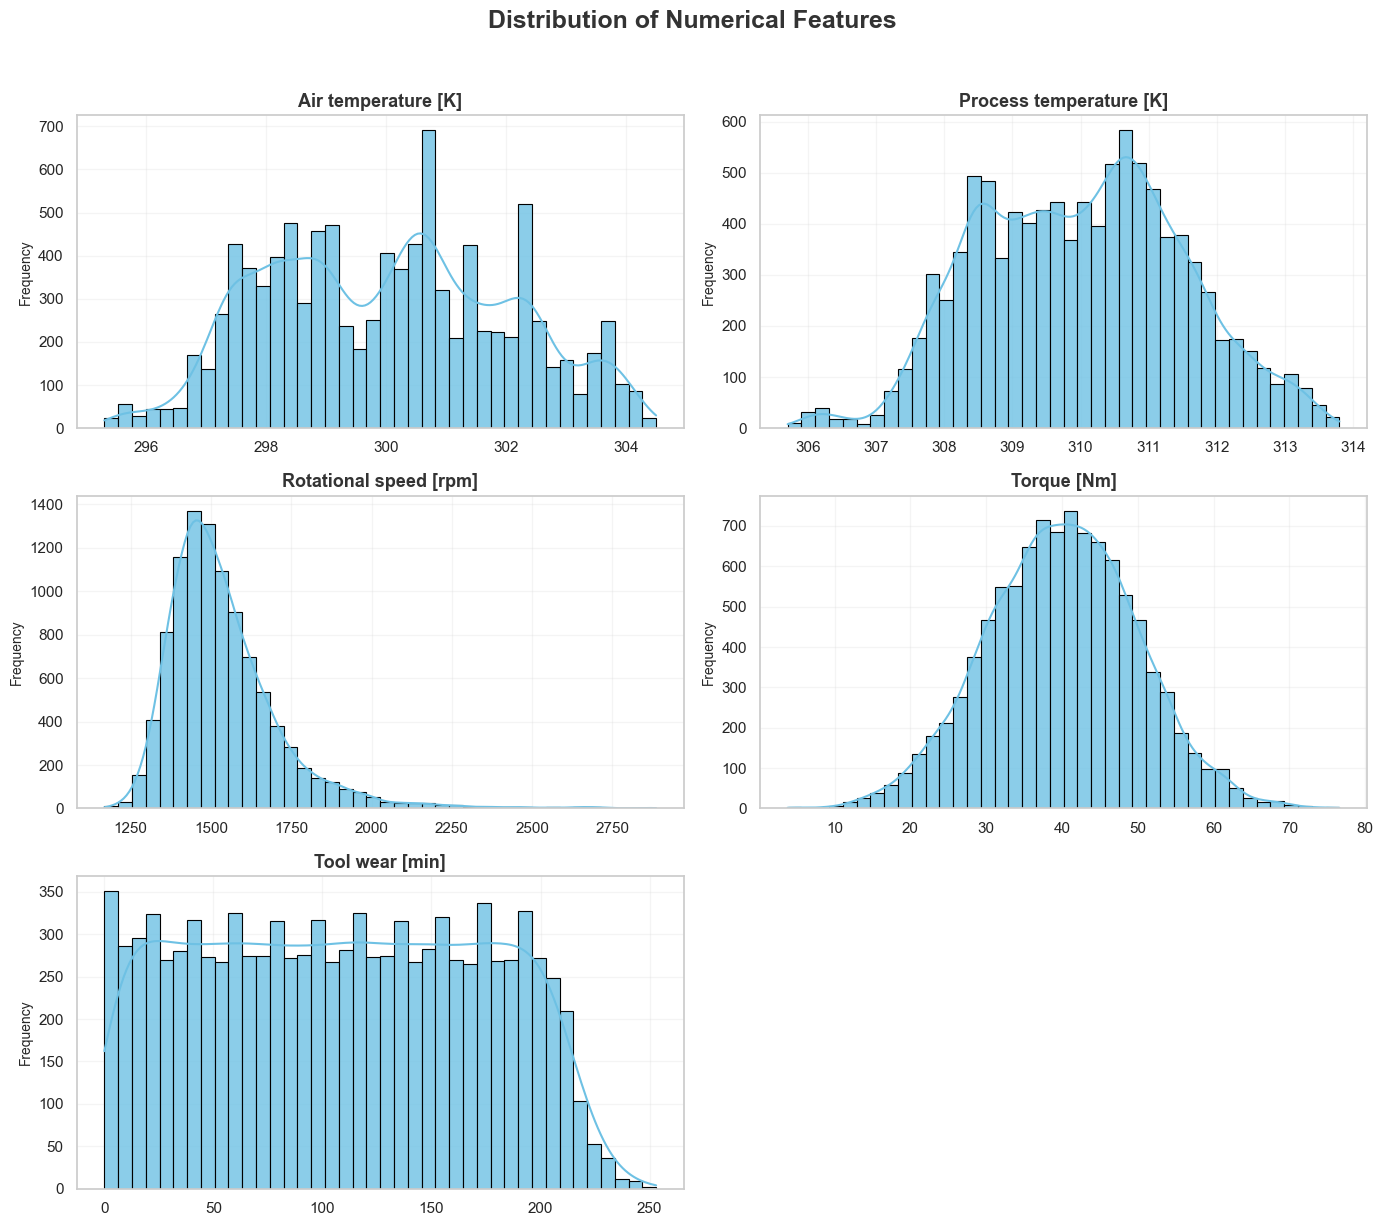

In [12]:
# Numerical features distribution
numerical_cols = ['Air temperature [K]', 'Process temperature [K]',
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.histplot(
        df[col],
        bins=40,
        kde=True,
        color='#6EC1E4',
        edgecolor='black',
        alpha=0.8,
        ax=axes[idx]
    )
    axes[idx].set_title(col, fontsize=13, fontweight='bold', color='#333333')
    axes[idx].set_xlabel('', fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(alpha=0.2)

fig.delaxes(axes[5])

fig.suptitle('Distribution of Numerical Features', fontsize=18, fontweight='bold', color='#333333', y=1.02)
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

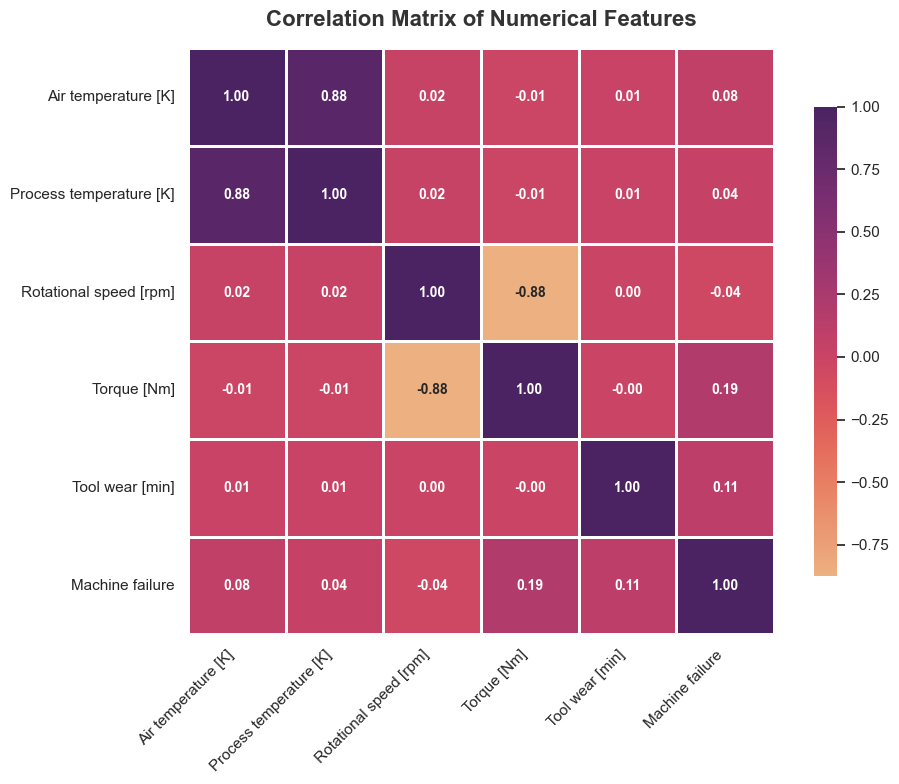


Correlation with Machine Failure:
Machine failure            1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64


In [13]:
correlation_cols = numerical_cols + ['Machine failure']
corr_matrix = df[correlation_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='flare',
    square=True,
    linewidths=0.8,
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 10, 'weight': 'bold'}
)

ax.set_title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', color='#333333', pad=16)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

print("\nCorrelation with Machine Failure:")
print(corr_matrix['Machine failure'].sort_values(ascending=False))

## 6. Feature vs Target Analysis

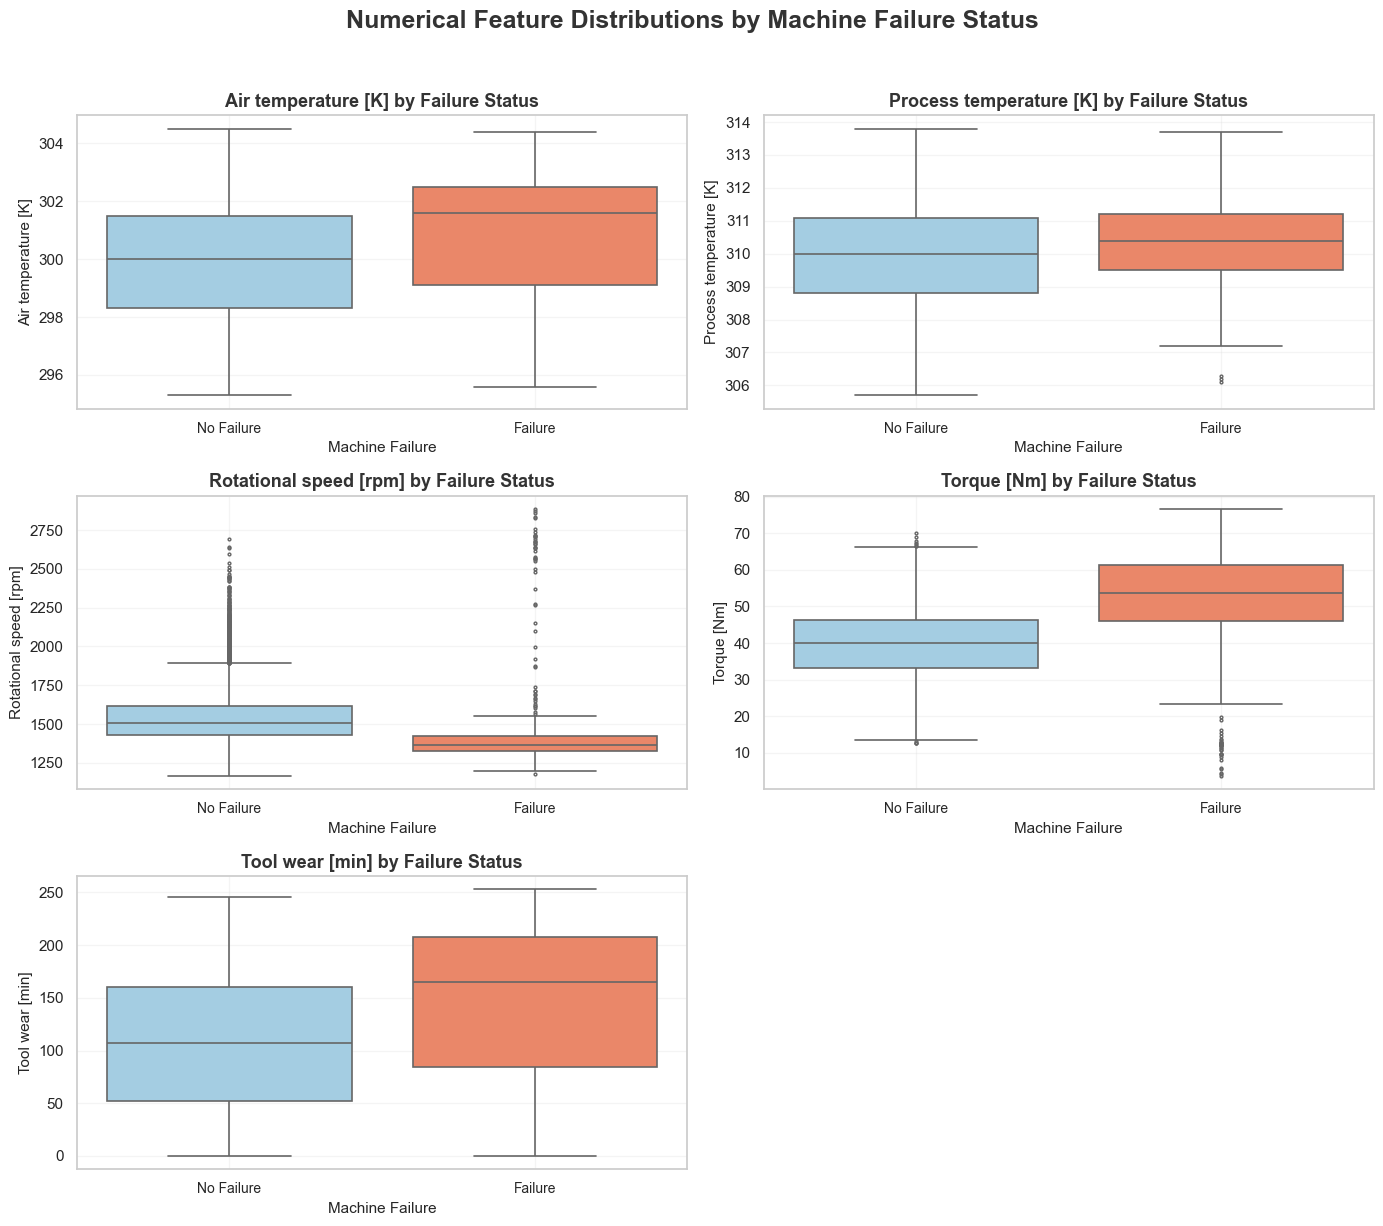

In [14]:
# Box plots for numerical features by failure status
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.ravel()

palette = ['#9AD0EC', '#FF7B54']

for idx, col in enumerate(numerical_cols):
    sns.boxplot(
        data=df,
        x='Machine failure',
        y=col,
        ax=axes[idx],
        palette=palette,
        linewidth=1.2,
        fliersize=2
    )
    axes[idx].set_title(f'{col} by Failure Status', fontsize=13, fontweight='bold', color='#333333')
    axes[idx].set_xlabel('Machine Failure', fontsize=11)
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].set_xticklabels(['No Failure', 'Failure'], fontsize=10)
    axes[idx].grid(alpha=0.2)

fig.delaxes(axes[5])
fig.suptitle('Numerical Feature Distributions by Machine Failure Status', fontsize=18, fontweight='bold', color='#333333', y=1.02)
plt.tight_layout()
plt.show()

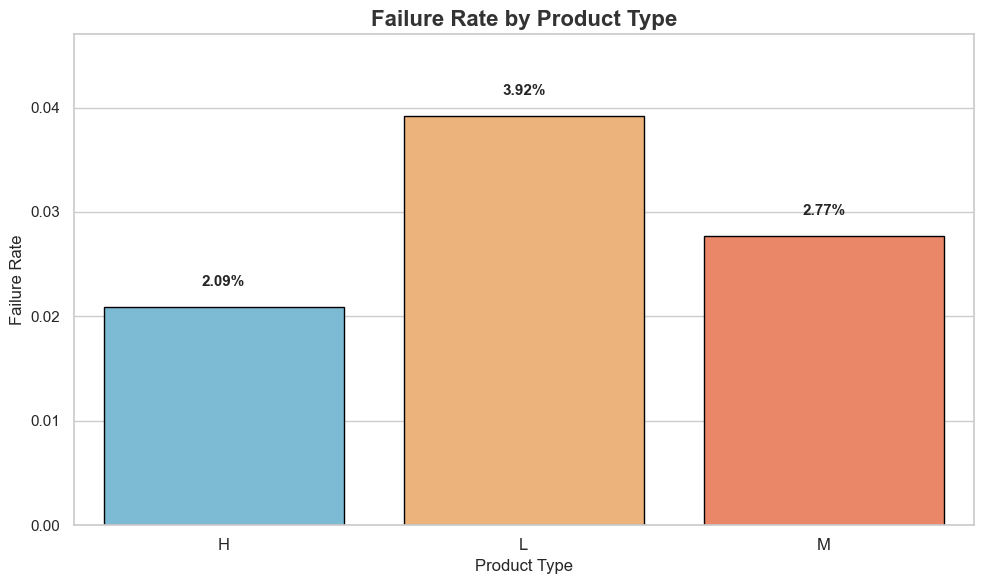

Failure Rate by Product Type:
      Failures  Total  Failure Rate
Type                               
H           21   1003      0.020937
L          235   6000      0.039167
M           83   2997      0.027694


In [15]:
failure_by_type = df.groupby('Type')['Machine failure'].agg(['sum', 'count', 'mean'])
failure_by_type.columns = ['Failures', 'Total', 'Failure Rate']

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=failure_by_type.index,
    y=failure_by_type['Failure Rate'],
    palette=['#6EC1E4', '#FFB26B', '#FF7B54'],
    edgecolor='black',
    ax=ax
)

for i, val in enumerate(failure_by_type['Failure Rate']):
    ax.text(i, val + 0.002, f'{val:.2%}', ha='center', fontsize=11, fontweight='semibold')

ax.set_title('Failure Rate by Product Type', fontsize=16, fontweight='bold', color='#333333')
ax.set_xlabel('Product Type', fontsize=12)
ax.set_ylabel('Failure Rate', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)
ax.set_ylim(0, failure_by_type['Failure Rate'].max() * 1.2)

plt.tight_layout()
plt.show()

print("Failure Rate by Product Type:")
print(failure_by_type)

## 7. Interactive Visualizations (Plotly)

In [16]:
# 3D scatter plot: Torque vs Rotational Speed vs Tool Wear
fig = px.scatter_3d(
    df,
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    z='Tool wear [min]',
    color='Machine failure',
    color_discrete_map={0: '#2ECC71', 1: '#E74C3C'},
    title='3D Scatter: Torque vs Rotational Speed vs Tool Wear by Failure Status',
    labels={
        'Rotational speed [rpm]': 'Rotational Speed (rpm)',
        'Torque [Nm]': 'Torque (Nm)',
        'Tool wear [min]': 'Tool Wear (min)',
        'Machine failure': 'Failure Status'
    },
    opacity=0.7,
    symbol='Machine failure',
    symbol_map={0: 'circle', 1: 'x'},
    width=950,
    height=700
)

fig.update_layout(
    title_font=dict(size=20, color='#333333', family='Arial Black'),
    scene=dict(
        xaxis_title='Rotational Speed (rpm)',
        yaxis_title='Torque (Nm)',
        zaxis_title='Tool Wear (min)',
        xaxis=dict(backgroundcolor='white', gridcolor='lightgrey', showbackground=True),
        yaxis=dict(backgroundcolor='white', gridcolor='lightgrey', showbackground=True),
        zaxis=dict(backgroundcolor='white', gridcolor='lightgrey', showbackground=True)
    ),
    legend=dict(
        title='Failure Status',
        itemsizing='constant',
        font=dict(size=12),
        bgcolor='rgba(255,255,255,0.7)'
    ),
    margin=dict(l=0, r=0, b=0, t=80)
)

fig.show()

In [17]:
# Interactive correlation heatmap
fig = px.imshow(
    corr_matrix,
    text_auto='.2f',
    color_continuous_scale='ice',
    title='Interactive Correlation Heatmap of Numerical Features',
    labels=dict(color='Correlation Coefficient')
)

fig.update_layout(
    width=900,
    height=750,
    title_font=dict(size=20, color='#333333', family='Arial Black'),
    xaxis=dict(
        tickangle=45,
        side='bottom',
        title_font=dict(size=14, color='#333333', family='Arial'),
        tickfont=dict(size=12, color='#333333')
    ),
    yaxis=dict(
        autorange='reversed',
        title_font=dict(size=14, color='#333333', family='Arial'),
        tickfont=dict(size=12, color='#333333')
    ),
    coloraxis_colorbar=dict(
        title='Correlation',
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticktext=['-1', '-0.5', '0', '0.5', '1'],
        title_font=dict(size=12),
        tickfont=dict(size=11)
    ),
    margin=dict(l=80, r=80, t=100, b=80)
)

fig.update_traces(
    hovertemplate="<b>%{x}</b> vs <b>%{y}</b><br>Correlation: %{z:.2f}<extra></extra>"
)

fig.show()

## 9. Data Export for Modeling

In [18]:
# Save EDA summary
summary = {
    'total_samples': len(df),
    'features': len(df.columns),
    'failure_rate': float(df['Machine failure'].mean()),
    'imbalance_ratio': float(target_counts[0] / target_counts[1]),
    'missing_values': int(df.isnull().sum().sum()),
    'product_types': df['Type'].unique().tolist(),
    'failure_types': failure_types
}

import json
with open('../data/eda_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("EDA summary saved to data/eda_summary.json")

EDA summary saved to data/eda_summary.json
